# **Важно!**

Домашнее задание состоит из нескольких задач, которые вам нужно решить.
*   Баллы выставляются по принципу выполнено/невыполнено.
*   За каждую выполненую задачу вы получаете баллы (количество баллов за задание указано в скобках).

**Инструкция выполнения:** Выполните задания в этом же ноутбуке (места под решения **КАЖДОЙ** задачи обозначены как **#НАЧАЛО ВАШЕГО РЕШЕНИЯ** и **#КОНЕЦ ВАШЕГО РЕШЕНИЯ**)

**Как отправить задание на проверку:** Вам необходимо сохранить ваше решение в данном блокноте и отправить итоговый **файл .IPYNB** на учебной платформе в **стандартную форму сдачи домашнего задания.**

**Срок проверки преподавателем:** домашнее задание проверяется **в течение 3 дней после дедлайна сдачи** с предоставлением обратной связи

# **Прежде чем проверять задания:**

1. Перезапустите **ядро (restart the kernel)**: в меню, выбрать **Ядро (Kernel)**
→ **Перезапустить (Restart)**
2. Затем **Выполнить** **все ячейки (run all cells)**: в меню, выбрать **Ячейка (Cell)**
→ **Запустить все (Run All)**.

После ячеек с заданием следуют ячейки с проверкой **с помощью assert.**

Если в коде есть ошибки, assert выведет уведомление об ошибке.

Если в коде нет ошибок, assert отработает без вывода дополнительной информации.

---

# Домашнее задание №4. Линейная классификация. Логистическая регрессия. Метод опорных векторов.

**Цели домашнего задания:** Решить проблемы бинарной классификации вручную. Решить многоклассовую классификацию на примере датасета рукописных цифр MNIST с помощью готовых библиотек. Реализовать метод опорных векторов.

In [4]:
# Запустите эту ячейку для первоначальной настройки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rc('lines', linewidth=2)

## Часть 1. Реализация алгоритма линейной классификации для бинарных данных

В этой части, мы создадим синтетический набор бинарных данных и обучим модель вручную. Для этого нам неодходимо написать функцию сигмоиды, вычислить функцию потерь и её производную, чтобы использовать их во время градиентного спуска.

**Задание 1 (1 балл)**

Реализуйте функцию сигмоиды `sigmoid(z)`.

In [5]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [6]:
assert np.isclose(sigmoid(5), 1, atol=0.01)

**Задание 2 (1 балл)**

Реализуйте логистическую функцию потерь `compute_cost(y, y_pred)`.



In [7]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
def compute_cost(y, y_pred):
	return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [8]:
y_pred = np.array([0.1, 0.8, 0.4])
y = np.array([0, 1, 0])

assert np.isclose(compute_cost(y, y_pred), 0.28, atol=0.01)

**Задание 3 (1 балл)**

Реализуйте градиент логистической функции потерь `compute_gradient(X, y, w)`.

In [9]:
def compute_gradient(X, y, w):
    # НАЧАЛО ВАШЕГО РЕШЕНИЯ
    gradient = np.dot(X.T, sigmoid(np.dot(X, w)) - y) / len(y)
    # КОНЕЦ ВАШЕГО РЕШЕНИЯ
    return gradient

In [10]:
X = np.array([[1, 2], [1, 3], [1, 4]])  # Пример данных с добавленным bias term
y = np.array([0, 1, 0])  # Метки классов
weights = np.array([0.1, -0.2])  # Начальные веса

assert np.allclose(compute_gradient(X, y, weights), [0.04, 0.10], atol=0.01)

**Задание 4 (1 балл)**

По аналогии с предыдущим домашним заданием, реализуйте функцию градиентного спуска.

In [22]:
# Функция градиентного спуска
def gradient_descent(X, y, w, learning_rate, num_iterations):
    # НАЧАЛО ВАШЕГО РЕШЕНИЯ
    
    for i in range(num_iterations):
        res = compute_gradient(X, y, w)
        w = w - learning_rate * res


    # КОНЕЦ ВАШЕГО РЕШЕНИЯ
    return w


In [23]:
assert np.allclose(gradient_descent(X, y, weights, 0.03, 300), [-0.01, -0.22], atol=0.01)

**Задание 5 (1 балл)**

Подготовьте синтетические бинарные данные с помощью команды из библиотеки `sklearn`. Используйте функцию `make_classification`. Создайте 200 точек с двумя признаками и двумя классами, без излишних признаков (`n_redundant=0`). Зафиксируйте `random_state=42`. Добавьте столбец единиц к данным для свободного члена.

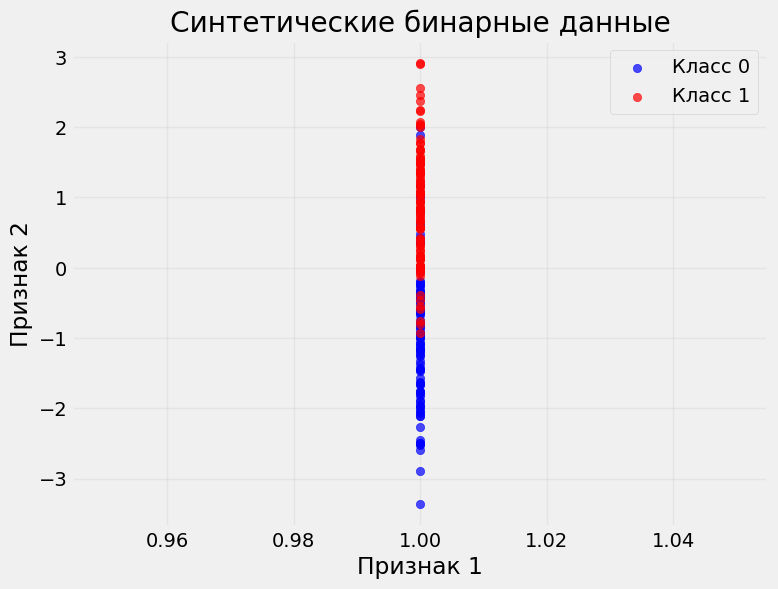

In [39]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
X_no_one, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)
X = np.hstack((np.ones((X_no_one.shape[0], 1)), X_no_one))
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

# Визуализация данных
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Класс 0', alpha=0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Класс 1', alpha=0.7)
plt.title("Синтетические бинарные данные")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Задание 6 (1 балл)**

Создайте новую переменную `X_ones`, добавив столбец единиц к данным для свободного члена с помощью `numpy` команды `concatenate`. Разбейте данные на тренировочную и тестовую выборки, выделив 20% данных под тестирование. Инициализируйте веса `weights` случайным образом.

In [40]:
from sklearn.model_selection import train_test_split
# Не удаляйте и не меняйте seed
np.random.seed(21)

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
X_ones = np.concatenate([np.ones((X_no_one.shape[0], 1)), X_no_one], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X_ones, y, test_size=0.2, random_state=42
)

weights = np.random.randn(X_ones.shape[1])
weights
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

array([-0.05196425, -0.11119605,  1.0417968 ])

In [41]:
assert X_ones.shape[1]==3 and X_ones.shape[0]==200
assert weights.shape[0]==3

**Задание 7 (1 балл)**

Обучите модель и предскажите значения для тестовой выборки. Вычислите значение функции потерь для тестовой выборки, `test_cost`.

*Hint!* Не забудьте сигмоиду ;)

In [56]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
def predict(X, weights):
    z = np.dot(X, weights)
    return sigmoid(z)

learning_rate = 0.03
num_iterations = 10000
trained_weights = gradient_descent(X_train, y_train, weights, learning_rate, num_iterations)

# Предсказываем значения для тестовой выборки
y_pred = predict(X_test, trained_weights)

# Вычисляем значение функции потерь для тестовой выборки
test_cost = compute_cost(y_test, y_pred)
test_cost
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

np.float64(0.3640718231723537)

In [59]:
assert np.isclose(test_cost, 0.3, atol=0.1)

## Часть 2. Реализация алгоритма бинарной классификации sklearn. Сравнение результатов.

**Задание 8 (1 балл)**

Реализуйте обучение на тех же данных с помощью готовой функции `LogisticRegression` из `sklearn.linear_model`. Предскажите вероятности для тестовой выборки с помощью метода `predict_proba` и оцените качество обучения при помощи `log_loss` из `sklearn.metrics`. Запишите значение функции потерь в переменную `cost_sklearn`.

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
y_pred_sklearn = LogisticRegression().fit(X_train, y_train).predict_proba(X_test)[:, 1]
cost_sklearn = log_loss(y_test, y_pred_sklearn)
cost_sklearn
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

0.36933686580253056

In [68]:
assert np.isclose(cost_sklearn, 0.3, atol=0.1)

Обратите внимание, что мы получили схожие значения функций потерь обоими методами.
Теперь мы можем перейти к многоклассовой классификации.

## Часть 3. Реализация алгоритма многоклассовой классификации на примере данных `digits`.



Теперь, когда мы разобрались с тем, как работает обучение модели бинарной классификации, мы можем перейти к проблеме многих классов. В качестве примера, рассмотрим задачу классификации рукописных цифр из классического набора данных `digits`. Первым шагом необходимо загрузить данные. Мы будем использовать функцию `load_digits` из модуля `sklearn.datasets`, которая загрузит набор данных `digits` с цифрами от 0 до 9.

In [69]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data # изображения, преобразованные из матрицы (8, 8) в вектор (64,)
y = digits.target

Для визуализации цифр из набора данных, загруженного с помощью библиотеки scikit-learn, можно использовать функцию `imshow() `библиотеки Matplotlib.

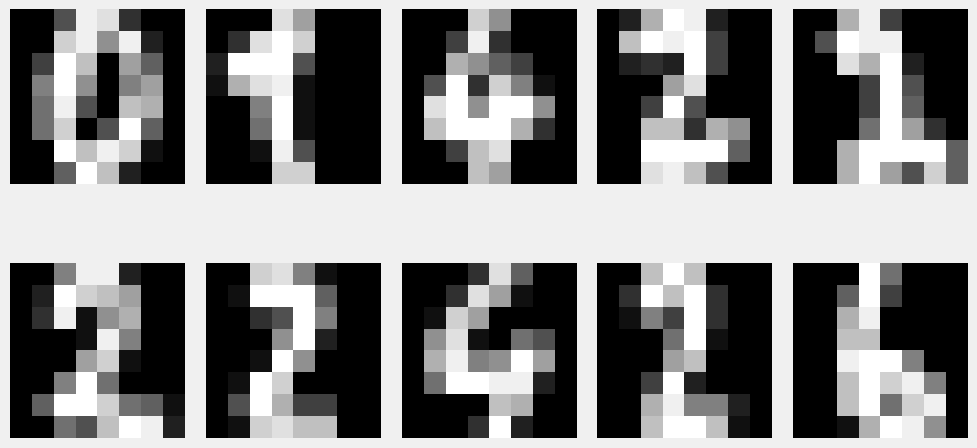

In [70]:
# Визуализация нескольких случайных изображений цифр
indices = np.random.choice(len(X), 10, replace=False)
random_digits = X[indices]

# Создаём сетку 5x2 для отображения изображений
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))

# Строим картинки в каждой ячейке сетки
for i, ax in enumerate(axes.flat):
    ax.imshow(random_digits[i].reshape((8,8)), cmap='gray')
    ax.axis('off')  # Убираем оси

# Эта команда помогает избегать наложений объектов графика
plt.tight_layout()
plt.show()

Как обычно, необходимо разделить данные на обучающую и тестовую выборки:

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

**Задание 9 (1 балл)**

Создайте по экземпляру класса `LogisticRegression` (`sklearn.linear_model`) и `SVC` (`sklearn.svm`). Внимательно почитайте официальную [документацию OneVsRestClassifier](https://scikit-learn.org/1.5/modules/generated/sklearn.multiclass.OneVsRestClassifier.html), обратите внимание на то, какие аргументы принимает этот класс. Назовите их `softmax_model` и `ovr_model`, соответственно. Обучите обе модели на данных MNIST. Сделайте предсказания для тестовой выборки.

In [76]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

np.random.seed(21)

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
softmax_model = LogisticRegression(max_iter=1000)
svm_model = SVC(probability=True, max_iter=1000)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [77]:
assert type(softmax_model) == LogisticRegression and softmax_model.max_iter == 1000
assert type(svm_model) == SVC and svm_model.max_iter == 1000

**Задание 10 (1 балл)**

Вычислите и сравните основные метрики классификации. Для вычисления `precision`, `recall` и `F1-score` воспользуйтесь готовыми метриками из библиотки `sklearn.metrics` (найдите названия нужных функций самостоятельно). Укажите аргумент `average='macro'` для вычисления метрик усреднённых по категориям. Сохраните значения метрик в переменные:

* `softmax_accuracy_score`
* `softmax_precision_score`
* `softmax_recall_score`
* `softmax_f1_score`


* `svm_accuracy_score`
* `svm_precision_score`
* `svm_recall_score`
* `svm_f1_score`



In [79]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
softmax_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

y_pred_softmax = softmax_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

softmax_accuracy_score = accuracy_score(y_test, y_pred_softmax)
softmax_precision_score = precision_score(y_test, y_pred_softmax, average='weighted')
softmax_recall_score = recall_score(y_test, y_pred_softmax, average='weighted')
softmax_f1_score = f1_score(y_test, y_pred_softmax, average='weighted')

svm_accuracy_score = accuracy_score(y_test, y_pred_svm)
svm_precision_score = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall_score = recall_score(y_test, y_pred_svm, average='weighted')
svm_f1_score = f1_score(y_test, y_pred_svm, average='weighted')


# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [81]:
# Качество по всем метрикам должно быть выше 95%
print(f"softmax_accuracy_score: {softmax_accuracy_score}")
print(f"softmax_precision_score: {softmax_precision_score}")
print(f"softmax_recall_score: {softmax_recall_score}")
print(f"softmax_f1_score: {softmax_f1_score}")

print(f"svm_accuracy_score: {svm_accuracy_score}")
print(f"svm_precision_score: {svm_precision_score}")
print(f"svm_recall_score: {svm_recall_score}")
print(f"svm_f1_score: {svm_f1_score}")

softmax_accuracy_score: 0.975
softmax_precision_score: 0.9754159635070488
softmax_recall_score: 0.975
softmax_f1_score: 0.9750006801173119
svm_accuracy_score: 0.9861111111111112
svm_precision_score: 0.9864790348334446
svm_recall_score: 0.9861111111111112
svm_f1_score: 0.9860510349888831


In [82]:
assert softmax_accuracy_score > 0.95
assert softmax_precision_score > 0.95
assert softmax_recall_score > 0.95
assert softmax_f1_score > 0.95

assert svm_accuracy_score > 0.95
assert svm_precision_score > 0.95
assert svm_recall_score > 0.95
assert svm_f1_score > 0.95

# Поздравляем!
В этом домашнем задании вы вручную реализовали алгоритм логистической регрессии с помощью градиентного спуска. Вы углубили навыки пользования библиотекой `sklearn` для обучения моделей, создания синтетических данных и вычисления метрик оценки качества моделей.